In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [2]:
df_admits = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\admissions.csv.gz', compression='gzip')
df_pat = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\patients.csv.gz', compression='gzip')
df_icd_proc = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\d_icd_procedures.csv.gz', compression='gzip')
df_icd_diagnosis = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\d_icd_diagnoses.csv.gz', compression='gzip')
df_proc = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\procedures_icd.csv.gz', compression='gzip')
df_diagnosis = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\diagnoses_icd.csv.gz', compression='gzip')
df_transfers = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\transfers.csv.gz', compression='gzip')
#df_medi = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\emar.csv.gz', compression='gzip')
#df_medi_details = pd.read_csv(r'S:\HealthInformatics\Analysis\Saaqib\MIMIC-IV\emar_detail.csv.gz', compression='gzip')


In [70]:
#print(df_admits.head(10))
print(df_diagnosis.head(10))
#print(df_icd_proc.head(10))
print(df_icd_diagnosis.head(10))

   subject_id   hadm_id  seq_num icd_code  icd_version
0    10000032  22595853        1     5723            9
1    10000032  22595853        2    78959            9
2    10000032  22595853        3     5715            9
3    10000032  22595853        4    07070            9
4    10000032  22595853        5      496            9
5    10000032  22595853        6    29680            9
6    10000032  22595853        7    30981            9
7    10000032  22595853        8    V1582            9
8    10000032  22841357        1    07071            9
9    10000032  22841357        2    78959            9
  icd_code  icd_version                             long_title
0     0010            9         Cholera due to vibrio cholerae
1     0011            9  Cholera due to vibrio cholerae el tor
2     0019            9                   Cholera, unspecified
3     0020            9                          Typhoid fever
4     0021            9                    Paratyphoid fever A
5     0022       

In [3]:
# Data Checks

#df_admits.isna().any() # check which columns have NaN
#df_admits.loc[:,df_admits.isna().any()]
#df_admits[df_admits['admission_location'] == '']

df_icd_proc[df_icd_proc['long_title'].isna()]


Empty DataFrame
Columns: [icd_code, icd_version, long_title]
Index: []

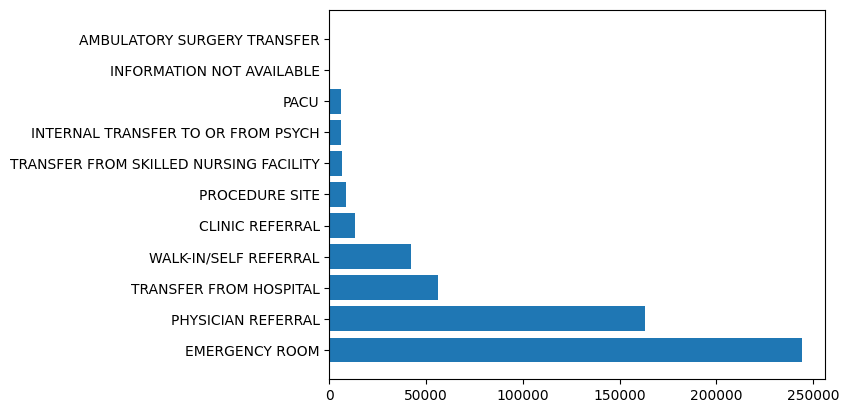

In [ ]:
plt.barh(df_admits['admission_location'].value_counts().index,df_admits.admission_location.value_counts().values)
plt.show() # to check for missing values 

In [3]:
# Join diagnosis, admissions and procs
df_admit_icd = pd.merge(df_admits,df_diagnosis,how = 'left', on = 'hadm_id')
df_admit_diagnosis = pd.merge(df_admit_icd,df_icd_diagnosis,how = 'left', on = 'icd_code')

In [4]:
pd.set_option('display.max_columns', None)
df_admit_diagnosis.rename(columns={'long_title': 'icd_diagnosis_name'}, inplace=True)
df_admit_diagnosis.head(5)

subject_id_x   hadm_id            admittime            dischtime deathtime  \
0      10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
1      10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
2      10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
3      10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
4      10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   

  admission_type admit_provider_id      admission_location discharge_location  \
0         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
1         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
2         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
3         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
4         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   

  insurance language marital_status   race            edregtime  \
0  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
1  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
2  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
3  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
4  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   

             edouttime  hospital_expire_flag  subject_id_y  seq_num icd_code  \
0  2180-05-06 23:30:00                     0    10000032.0      1.0     5723   
1  2180-05-06 23:30:00                     0    10000032.0      2.0    78959   
2  2180-05-06 23:30:00                     0    10000032.0      3.0     5715   
3  2180-05-06 23:30:00                     0    10000032.0      4.0    07070   
4  2180-05-06 23:30:00                     0    10000032.0      5.0      496   

   icd_version_x  icd_version_y  \
0            9.0            9.0   
1            9.0            9.0   
2            9.0            9.0   
3            9.0            9.0   
4            9.0            9.0   

                                  icd_diagnosis_name  
0                                Portal hypertension  
1                                      Other ascites  
2      Cirrhosis of liver without mention of alcohol  
3  Unspecified viral hepatitis C without hepatic ...  
4  Chronic airway obstruction, not elsewhere clas...

In [ ]:
# Next stage
# 1 - Enocode diagnosis
# 2 - Assign appointment readimission instance flags

In [5]:
# 1. 
# 
# Check for how many diagnosis that exist - will need to group diagnosis first for easier encoding
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')

print(df_admit_diagnosis.icd_diagnosis_name.value_counts())

icd_diagnosis_name
Unspecified essential hypertension                                                                                                                                                                                             102368
Hyperlipidemia, unspecified                                                                                                                                                                                                     84570
Essential (primary) hypertension                                                                                                                                                                                                83775
Other and unspecified hyperlipidemia                                                                                                                                                                                            67293
Acute kidney failure, unspecified                            

In [6]:
#pd.reset_option('display.max_rows')
# Replace all NaN with 'No Diagnosis'
df_admit_diagnosis['icd_diagnosis_name'] = df_admit_diagnosis['icd_diagnosis_name'].fillna('No Diagnosis')
df_admit_diagnosis[df_admit_diagnosis['icd_diagnosis_name'].isna()]

Empty DataFrame
Columns: [subject_id_x, hadm_id, admittime, dischtime, deathtime, admission_type, admit_provider_id, admission_location, discharge_location, insurance, language, marital_status, race, edregtime, edouttime, hospital_expire_flag, subject_id_y, seq_num, icd_code, icd_version_x, icd_version_y, icd_diagnosis_name]
Index: []

In [7]:
# Apply K-means clustering for text column
# Inital vectorizer step is key for good clustering - add in custom conditions for stop words and removal of common words

vectorizer = TfidfVectorizer(
                            #stop_words='english',
                             ngram_range=(1, 2),    # combines phrases  
                             max_df=0.95)           # removes common words
vectorized_words = vectorizer.fit_transform(df_admit_diagnosis['icd_diagnosis_name'])


In [8]:
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_data = svd.fit_transform(vectorized_words)

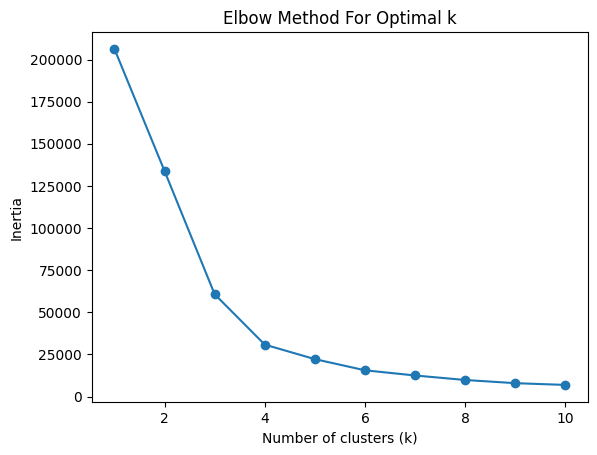

In [9]:
# Use Elbow Method to determine the number of clusters to use

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)  # use reduced TF-IDF data (from TruncatedSVD)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=5, max_iter=500, random_state=42)
kmeans.fit(vectorized_words)

KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

In [11]:
results_diagnosis = pd.DataFrame()
results_diagnosis['diagnosis'] = df_admit_diagnosis['icd_diagnosis_name']
results_diagnosis['cluster'] = kmeans.labels_

results_diagnosis.head(10)

diagnosis  cluster
0                                Portal hypertension        0
1                                      Other ascites        0
2      Cirrhosis of liver without mention of alcohol        0
3  Unspecified viral hepatitis C without hepatic ...        0
4  Chronic airway obstruction, not elsewhere clas...        0
5                      Bipolar disorder, unspecified        0
6                      Posttraumatic stress disorder        0
7                    Personal history of tobacco use        1
8    Unspecified viral hepatitis C with hepatic coma        0
9                                      Other ascites        0

C:\Users\smahmood\AppData\Local\Temp\ipykernel_4996\727227039.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
c:\Users\smahmood\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


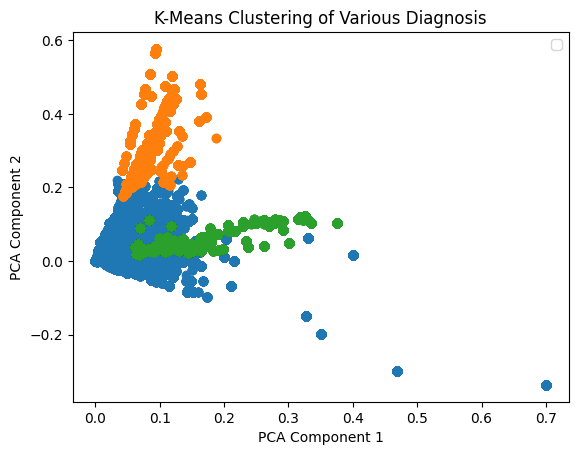

In [12]:
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1], 
                )

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering of Various Diagnosis')
plt.show()

In [13]:
df_admit_diagnosis['diagnosis_cluster'] = kmeans.labels_
print(df_admit_diagnosis['diagnosis_cluster'].value_counts())

diagnosis_cluster
0    5454383
2     543744
1     486632
Name: count, dtype: int64


In [14]:
df_admit_diagnosis.drop(columns = ['icd_version_y','subject_id_y'],axis = 1,inplace = True)
df_admit_diagnosis.rename(columns={'icd_version_x': 'icd_version','subject_id_x':'subject_id'}, inplace=True)

In [15]:
df_admit_diagnosis.head(5)

subject_id   hadm_id            admittime            dischtime deathtime  \
0    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
1    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
2    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
3    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
4    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   

  admission_type admit_provider_id      admission_location discharge_location  \
0         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
1         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
2         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
3         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   
4         URGENT            P49AFC  TRANSFER FROM HOSPITAL               HOME   

  insurance language marital_status   race            edregtime  \
0  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
1  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
2  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
3  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   
4  Medicaid  English        WIDOWED  WHITE  2180-05-06 19:17:00   

             edouttime  hospital_expire_flag  seq_num icd_code  icd_version  \
0  2180-05-06 23:30:00                     0      1.0     5723          9.0   
1  2180-05-06 23:30:00                     0      2.0    78959          9.0   
2  2180-05-06 23:30:00                     0      3.0     5715          9.0   
3  2180-05-06 23:30:00                     0      4.0    07070          9.0   
4  2180-05-06 23:30:00                     0      5.0      496          9.0   

                                  icd_diagnosis_name  diagnosis_cluster  
0                                Portal hypertension                  0  
1                                      Other ascites                  0  
2      Cirrhosis of liver without mention of alcohol                  0  
3  Unspecified viral hepatitis C without hepatic ...                  0  
4  Chronic airway obstruction, not elsewhere clas...                  0